---
## Final Project:
### Nathan Crutchfield and Trevor Nemitz
### CSC380: Principles of Data Science
### Cesim Erten  

---
# 0. Pre-Training, Data Processing, etc
- Extract the three TPD CSVs and get the relevent info
- Combine three dataframes after mapping the neighborhoods
- Save the CSV

## Relevent Modules:
- Pandas   - dataframe, data representation
- Datetime - parsing dates

## Module Versions:
- Pandas:   '1.5.3'

In [1]:
intermediate_write_out = True
print_debug = True

In [2]:
import pandas as pd
import datetime

---
## 0.1 Arrests Cleaning
- Get the valid columns from the arrests data
- Use the process_df function to make the data interpretable
---
### Relevent Data Columns

In [3]:
valid_cols = ["NHA_NAME", "sex", "age", "datetime_arr", "fel_misd"]

---
### Function for Interpreting Arrests Data

In [4]:
def process_df(df):
    df = df[valid_cols].dropna()
    date_arr = []
    month_arr = []
    proper_time_arr = []
    for i in range(len(df)):
        datetime_arr = list(df["datetime_arr"])[i].split(" ") # extract date and time str

        date = datetime_arr[0].strip()
        time = datetime_arr[1].strip().split(":")
    
        realtime = int(time[0]) - 7
        if (realtime < 0):
            realtime = 24 + realtime
        proper_time_arr.append(f"{realtime}{time[1]}")
        
        calc_date = datetime.datetime.strptime(date, '%Y/%m/%d') 
        day = (calc_date.weekday() + 1) % 7
        date_arr.append(day)
        month_arr.append(calc_date.month-1)

    df = df.drop("datetime_arr", axis=1)
    df["day"] = date_arr
    df["month"] = month_arr
    df["time"] = proper_time_arr

    return df

---
### Find the DFs for Both Years

In [5]:
arrests_2020 = pd.read_csv("./data/Arrests_2020.csv")
arrests_2020 = process_df(arrests_2020)

if print_debug:
    print(arrests_2020)

              NHA_NAME sex age fel_misd  day  month  time
12        Dodge Flower   M  21        M    4      0  1610
13        Dodge Flower   M  21        M    4      0  1610
15     West University   M  24        M    5      0  1716
16     West University   M  24        M    5      0  1716
17        Dodge Flower   M  21        M    4      0  1610
...                ...  ..  ..      ...  ...    ...   ...
51531        Pie Allen   M  39        M    0      2  1738
51539     San Clemente   M  23        M    6      2  1804
51540     San Clemente   M  23        M    6      2  1804
51541     San Clemente   M  23        M    6      2  1804
51543         Downtown   M  65        M    0      2  1833

[37309 rows x 7 columns]


In [6]:
arrests_2021 = pd.read_csv("./data/Arrests_2021.csv")
arrests_2021 = process_df(arrests_2021)

if print_debug:
    print(arrests_2021)

              NHA_NAME sex age fel_misd  day  month  time
3             Eastside   M  15        M    6      0  1144
4             Eastside   M  15        M    6      0  1144
5           Rita Ranch   F  25        M    6      0  1305
6      Garden District   M  34        F    6      0  1449
8      Garden District   M  34        F    6      0  1449
...                ...  ..  ..      ...  ...    ...   ...
45407            Amphi   F  49        M    2      1   109
45408    Flowing Wells   M  22        M    4      2   827
45412    Flowing Wells   M  22        M    4      2   827
45413    Flowing Wells   M  22             4      2   827
45419         Downtown   M  30        F    1      1   400

[32086 rows x 7 columns]


In [7]:
if intermediate_write_out:
    arrests_2020.to_csv('./clean_data/Arrests_2020_cleaned.csv', index=False)
    arrests_2021.to_csv('./clean_data/Arrests_2021_cleaned.csv', index=False)

---
## 0.2 Neighborhood Wealth Cleaning:
---
### Extracting Relevent Columns

In [8]:
neighborhood = pd.read_csv("./data/Neighborhood_Income.csv")
neighborhood.set_index('NAME', inplace=True)
neighborhood = neighborhood[["MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]]

if print_debug:
    print(neighborhood)

                       MEDHINC_CY  WLTHINDXCY  TOTHH_CY
NAME                                                   
A Mountain                  39293          32      1103
Adelanto                    33635          28       117
Alvernon Heights            29762          26        99
Amphi                       20213          20      3105
Armory Park                 36870          48      1223
...                           ...         ...       ...
West Lamar City Acres       38082          46       121
Loma Verde                  43696          73       233
Downtown                    36471          26       111
Barrio Santa Cruz           27188          33        64
Bonanza                     62571          69      2319

[159 rows x 3 columns]


In [9]:
if intermediate_write_out:
    neighborhood.to_csv('./clean_data/neighborhood_cleaned.csv', index=True)

---
## 0.3 Merging DFs:

In [10]:
arrests_df = pd.concat([arrests_2020, arrests_2021])

if print_debug:
    print(arrests_df)

              NHA_NAME sex age fel_misd  day  month  time
12        Dodge Flower   M  21        M    4      0  1610
13        Dodge Flower   M  21        M    4      0  1610
15     West University   M  24        M    5      0  1716
16     West University   M  24        M    5      0  1716
17        Dodge Flower   M  21        M    4      0  1610
...                ...  ..  ..      ...  ...    ...   ...
45407            Amphi   F  49        M    2      1   109
45408    Flowing Wells   M  22        M    4      2   827
45412    Flowing Wells   M  22        M    4      2   827
45413    Flowing Wells   M  22             4      2   827
45419         Downtown   M  30        F    1      1   400

[69395 rows x 7 columns]


---
### Map the Wealth and Total Household to the Arrest Neighborhood

In [11]:
arrests_df['MEDHINC_CY'] = arrests_df['NHA_NAME'].map(neighborhood['MEDHINC_CY'])
arrests_df['WLTHINDXCY'] = arrests_df['NHA_NAME'].map(neighborhood['WLTHINDXCY'])
arrests_df['TOTHH_CY'] = arrests_df['NHA_NAME'].map(neighborhood['TOTHH_CY'])
arrests_df.dropna()
arrests_df = arrests_df[["NHA_NAME","sex","age","day","month","MEDHINC_CY","WLTHINDXCY", "time", "TOTHH_CY", "fel_misd"]]

if print_debug:
    print(arrests_df)

              NHA_NAME sex age  day  month  MEDHINC_CY  WLTHINDXCY  time  \
12        Dodge Flower   M  21    4      0     25336.0        27.0  1610   
13        Dodge Flower   M  21    4      0     25336.0        27.0  1610   
15     West University   M  24    5      0     25427.0        30.0  1716   
16     West University   M  24    5      0     25427.0        30.0  1716   
17        Dodge Flower   M  21    4      0     25336.0        27.0  1610   
...                ...  ..  ..  ...    ...         ...         ...   ...   
45407            Amphi   F  49    2      1     20213.0        20.0   109   
45408    Flowing Wells   M  22    4      2     30668.0        35.0   827   
45412    Flowing Wells   M  22    4      2     30668.0        35.0   827   
45413    Flowing Wells   M  22    4      2     30668.0        35.0   827   
45419         Downtown   M  30    1      1     36471.0        26.0   400   

       TOTHH_CY fel_misd  
12       1309.0        M  
13       1309.0        M  
15    

---
### Remove the Neighborhood Name Column

In [12]:
arrests_df = arrests_df.drop(columns="NHA_NAME")

---
## 0.4 Finding Non-Numeric Age Indices

In [13]:
x = list(arrests_df["age"])
arr = []
for i, val in enumerate(x):
    try:
        int(val)
    except:
        arr.append(i)

if print_debug:
    print(arr)

[165, 168, 224, 225, 226, 306, 405, 439, 564, 565, 566, 567, 568, 855, 965, 1143, 1144, 1145, 1147, 1150, 1151, 1158, 1159, 1160, 1161, 1169, 1274, 1275, 1276, 1288, 1289, 1292, 1315, 1316, 1381, 1382, 1455, 1456, 1548, 1550, 1610, 1737, 1738, 1995, 1996, 2093, 2096, 2379, 2381, 2382, 2444, 2468, 2469, 2470, 2477, 2493, 2527, 2528, 2563, 2564, 2614, 2741, 2847, 2848, 2945, 2946, 2947, 2948, 2949, 2966, 2967, 2981, 3214, 3215, 3419, 3527, 3528, 3530, 3568, 3569, 3719, 3758, 3759, 3761, 3902, 3923, 3924, 4040, 4112, 4114, 4157, 4551, 4552, 4553, 4554, 5005, 5006, 5007, 5045, 5046, 5047, 5048, 5052, 5129, 5130, 5401, 5402, 5591, 5593, 5594, 5652, 5653, 5655, 5656, 5667, 5668, 5670, 5671, 5818, 5827, 5949, 5967, 5968, 5969, 5970, 5971, 5991, 5992, 5993, 5994, 5997, 6154, 6161, 6190, 6191, 6344, 6435, 6441, 6442, 6443, 6444, 6445, 6446, 6447, 6448, 6449, 6450, 6451, 6452, 6453, 6454, 6455, 6456, 6457, 6766, 6773, 6817, 6836, 6839, 6901, 6902, 6903, 6904, 6906, 6915, 6940, 6941, 6966, 6967, 

---
### Cleaning Age and MEDHINC Columns and Resetting Indices

In [14]:
df = arrests_df.set_axis([i for i in range(len(arrests_df))])
df = df.drop(arr, axis=0) # drop rows with age = ' '

if print_debug:
    print(df)

      sex age  day  month  MEDHINC_CY  WLTHINDXCY  time  TOTHH_CY fel_misd
0       M  21    4      0     25336.0        27.0  1610    1309.0        M
1       M  21    4      0     25336.0        27.0  1610    1309.0        M
2       M  24    5      0     25427.0        30.0  1716    1359.0        M
3       M  24    5      0     25427.0        30.0  1716    1359.0        M
4       M  21    4      0     25336.0        27.0  1610    1309.0        M
...    ..  ..  ...    ...         ...         ...   ...       ...      ...
69390   F  49    2      1     20213.0        20.0   109    3105.0        M
69391   M  22    4      2     30668.0        35.0   827    3825.0        M
69392   M  22    4      2     30668.0        35.0   827    3825.0        M
69393   M  22    4      2     30668.0        35.0   827    3825.0         
69394   M  30    1      1     36471.0        26.0   400     111.0        F

[68078 rows x 9 columns]


In [15]:
# remove null medhinc_cy calues
df = df.reset_index()
for i, a in enumerate(df['time']):
    try:
        int(a)
    except:
        print(a)
        break
        df = df.drop([i], axis=0)

---
## Save DF

In [16]:
df.to_csv('./clean_data/fully_merged_data.csv', index=False)

---
## 0.6 Show the Correlation of Inputs
### Relevent Modules:
- Seaborn  - Data visualization
- Warnings - Ignore warning messages
### Module Versions:
- Seaborn: '0.12.2'

In [17]:
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df = df.dropna()

# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)

df[need_norm] = norm

df_pandas_encoded = pd.get_dummies(df, columns=['sex', 'day', 'month'], drop_first=True)
df_pandas_encoded.head()

,index,age,MEDHINC_CY,WLTHINDXCY,time,TOTHH_CY,fel_misd,sex_M,sex_U,day_1,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0,-1.007650,-0.795643,-0.502892,1610,-0.442905,M,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.007650,-0.795643,-0.502892,1610,-0.442905,M,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,-0.759528,-0.788811,-0.373469,1716,-0.405740,M,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,-0.759528,-0.788811,-0.373469,1716,-0.405740,M,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,-1.007650,-0.795643,-0.502892,1610,-0.442905,M,1,0,0,...,0,0,0,0,0,0,0,0,0,0


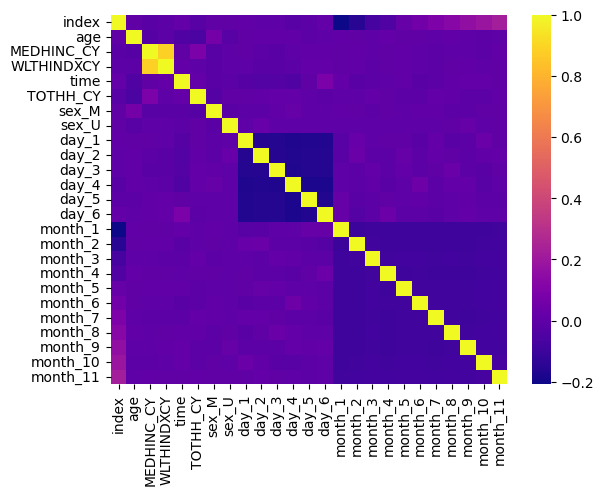

In [19]:
dataplot = sb.heatmap(df_pandas_encoded.corr(numeric_only=True), cmap='plasma')

- - - - - - - - - - - - - - - - - - -
# 1. Imports
## Relevent Modules:
    - Pandas     - dataframe, data representation
    - Numpy      - data manipulation, random generation
    - Sklearn    - Regression models, data split, one-hot encoding, 
                   metrics, cross validation
    - Matplotlib - Data visualization
    - Seaborn    - Data visualization
    - Random     - Shuffling data
    - Scipy      - T-Test

## Module Versions:
    - Pandas:     '1.5.3'
    - Numpy:      '1.24.3'
    - Sklearn:    '1.3.0'
    - Matplotlib: '3.7.1'
    - Seaborn:    '0.12.2'
    - Scipy:      '1.10.1'

In [20]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from random import shuffle

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from scipy.stats import t

- - - - - - - - - - - - - - - - - - -
# 2. Data
 - Reads in the data from a cleaned file
 - Removes null lines and corrects empty class for 'fel_misd'
 - Normalizes the relevent columns
 - Remove the oversized and generate data for undersized classes:
     - M: 46803 $\to$ 2194
     - F: 16407 $\to$ 2194
     - C: 2194  $\to$ 2194
     - S: 240   $\to$  360
     - P: 50    $\to$   75
     
     - Note that the data generation is done using the distribution
       of each of the inputs per each class. Since the inputs have
       low correleation (see the correlation heatmap) the joint pdf
       will be extremely close to the individual pdf for each input.
 - One hot encode the inputs

---
## 2.1 Reading Data

In [21]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")
df.shape

(68078, 10)

In [22]:
# delete empty values
df = df.dropna()
df.shape

(67927, 10)

In [23]:
# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)
df.shape

(65694, 10)

---
## 2.2 Normalizing data

In [24]:
# z-score normalize desired columns
from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)
norm.head()

,age,MEDHINC_CY,WLTHINDXCY,TOTHH_CY
0,-1.007650,-0.795643,-0.502892,-0.442905
1,-1.007650,-0.795643,-0.502892,-0.442905
2,-0.759528,-0.788811,-0.373469,-0.405740
3,-0.759528,-0.788811,-0.373469,-0.405740
4,-1.007650,-0.795643,-0.502892,-0.442905


In [25]:
df[need_norm] = norm
df.head()

,index,sex,age,day,month,MEDHINC_CY,WLTHINDXCY,time,TOTHH_CY,fel_misd
0,0,M,-1.007650,4,0,-0.795643,-0.502892,1610,-0.442905,M
1,1,M,-1.007650,4,0,-0.795643,-0.502892,1610,-0.442905,M
2,2,M,-0.759528,5,0,-0.788811,-0.373469,1716,-0.405740,M
3,3,M,-0.759528,5,0,-0.788811,-0.373469,1716,-0.405740,M
4,4,M,-1.007650,4,0,-0.795643,-0.502892,1610,-0.442905,M


---
## 2.3 Over and under-sized classes

In [26]:
df["fel_misd"].value_counts()

M    46803
F    16407
C     2194
S      240
P       50
Name: fel_misd, dtype: int64

---
### 2.3.1 Drop random points from oversized data

In [27]:
m_arr = df.index[df["fel_misd"] == 'M'].tolist()
shuffle(m_arr)


df = df.drop(m_arr[0:len(m_arr)-2194], axis = 0)


s_arr = df.index[df["fel_misd"] == 'S'].tolist()
p_arr = df.index[df["fel_misd"] == 'P'].tolist()

f_arr = df.index[df["fel_misd"] == 'F'].tolist()
shuffle(f_arr)
df = df.drop(f_arr[0:len(f_arr)-2194], axis = 0)

df['fel_misd'].value_counts()

C    2194
M    2194
F    2194
S     240
P      50
Name: fel_misd, dtype: int64

---
### 2.3.2 Statistical Generation for Undersized Classes

In [28]:
def gen_rand_df(temp_df,samples=1):
    ''' 
    Assume that temp_df is only populated with same fel_misd class and no one-hot 
    encoding
    Age, MEDHINC_CY, WLTHINDXCY, time_arr, TOTHH_CY should be normalized prior
    to calling this function 
    '''

    # Dictionary to put into data frame
    d = {}
    
    # Find the pdf for the 'sex' input
    choices = temp_df['sex'].value_counts().index.to_list()
    v_c = temp_df['sex'].value_counts()
    probs = v_c/sum(v_c)
    
    # Update the dictionary at 'sex' to data generated from pdf
    d['sex'] = np.random.choice(choices, p=probs, size=samples)
    
    # Repeat...
    choices = temp_df['day'].value_counts().index.to_list()
    v_c = temp_df['day'].value_counts()
    probs = v_c/sum(v_c)    
    d['day'] = np.random.choice(choices, p=probs,size=samples)
    
    choices = temp_df['month'].value_counts().index.to_list()
    v_c = temp_df['month'].value_counts()
    probs = v_c/sum(v_c)    
    d['month'] = np.random.choice(choices, p=probs, size=samples)
    
    x = np.random.standard_t(len(temp_df)-1,size=(5,samples)) # df = amt_samples - 1
    d['age'] = x[0]
    d['MEDHINC_CY'] = x[1]
    d['WLTHINDXCY'] = x[2]
    d['time'] = x[3]
    d['TOTHH_CY'] = x[4]
    d['fel_misd'] = [temp_df['fel_misd'].to_list()[0] for i in range(samples)]
    
    df_return = pd.DataFrame.from_dict(d)

    
    return df_return

# Increase the undersized class by 50%

s_amt = (int) (0.5*240)  
p_amt = (int) (0.5*50)    
inp = df[df['fel_misd'] == 'S']
s_temp = gen_rand_df(inp,s_amt)

inp = df[df['fel_misd'] == 'P']
p_temp = gen_rand_df(inp,p_amt)

df = pd.concat([df,s_temp,p_temp])
df['fel_misd'].value_counts()

C    2194
M    2194
F    2194
S     360
P      75
Name: fel_misd, dtype: int64

---
## 2.4 One-Hot Encoding

In [29]:
df_pandas_encoded = pd.get_dummies(df, columns=['sex', 'day', 'month'], drop_first=True)
df_pandas_encoded = df_pandas_encoded.drop("WLTHINDXCY", axis=1)
df_pandas_encoded = df_pandas_encoded.drop("index", axis=1)
df_pandas_encoded.dropna()
df_pandas_encoded.head()

,age,MEDHINC_CY,time,TOTHH_CY,fel_misd,sex_M,sex_U,day_1,day_2,day_3,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
7,-0.759528,-0.788811,1716.0,-0.405740,C,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,-1.586601,-1.455490,2144.0,-0.874763,M,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,-0.511406,-0.009893,2143.0,-1.133433,M,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0.481082,-0.448339,923.0,0.009023,F,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0.481082,-0.448339,923.0,0.009023,F,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- - - - - - - - - - - - - - - - - - -
# 3. Pre-Training
- Find the train and test sets (0.8 train split)
- Find all the combinations of the inputs
- Perform 5-fold cross validation for each combination

---
## 3.1 Find the Input and Output names

In [30]:
inp = list(df_pandas_encoded.columns)
oup = ["fel_misd"]
for x in oup:
    inp.remove(x)
inp, oup

(['age',
  'MEDHINC_CY',
  'time',
  'TOTHH_CY',
  'sex_M',
  'sex_U',
  'day_1',
  'day_2',
  'day_3',
  'day_4',
  'day_5',
  'day_6',
  'month_1',
  'month_2',
  'month_3',
  'month_4',
  'month_5',
  'month_6',
  'month_7',
  'month_8',
  'month_9',
  'month_10',
  'month_11'],
 ['fel_misd'])

---
## 3.2 Split Train and Test Data

In [31]:
x,y = df_pandas_encoded[inp], df_pandas_encoded[oup]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, shuffle=True)

---
## 3.3 Find Combinations

In [32]:
import itertools
items = ['MEDHINC_CY','age','sex_M', 'day', 'month']
combs = []
for i in range(1, len(items)):
    combs.append(list(set(itertools.combinations(items, i))))

In [33]:
day_vals = ['day_1',
          'day_2',
          'day_3',
          'day_4',
          'day_5',
          'day_6']

month_vals = ['month_1',
              'month_2',
              'month_3',
              'month_4',
              'month_5',
              'month_6',
              'month_7',
              'month_8',
              'month_9',
              'month_10',
              'month_11']

best_dict = {"features": [], "score": -2**31}
for k_amt in combs:
    for ind_comb in k_amt:
        comb = list(ind_comb)
        if 'day' in comb:
            comb.remove('day')
            comb += day_vals
        if 'month' in comb:
            comb.remove('month')
            comb += month_vals

        
        x_subset = x_train[comb].values
        cvs = cross_val_score(linear_model.LogisticRegression(multi_class='ovr'), x_subset, y_train)
        
        if cvs.mean() > best_dict["score"]:
            best_dict["features"] = comb
            best_dict["score"] = cvs.mean()
best_dict

{'features': ['MEDHINC_CY',
  'age',
  'sex_M',
  'day_1',
  'day_2',
  'day_3',
  'day_4',
  'day_5',
  'day_6'],
 'score': 0.3853513395967956}

-------
# 4. Training Logistic Model
- Train a 5-class logistic regression using one-vs-rest classification
    - Use the best features calculated in cross validation
- Fit the train data
- Find the predicted data for the test set and show the accuracy
- Visualize and show the confusion matrix using heatmap
- Show the classification report
- Show the weights for each input and model
    - Both tabular and heatmap

---
## 4.1 Training

In [34]:
log_r = linear_model.LogisticRegression(penalty='l2', multi_class="ovr")

In [35]:
best_dict["features"]

['MEDHINC_CY',
 'age',
 'sex_M',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6']

In [36]:
x_train = x_train[best_dict["features"]]
x_test = x_test[best_dict["features"]]

log_r.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

---
## 4.2 Analysis
---
### 4.2.1 Accuracy

In [37]:
y_pred = log_r.predict(x_test)
print(f"Accuracy train: {log_r.score(x_train,y_train)}")
print(f"Accuracy Test: {log_r.score(x_test,y_test)}")

Accuracy train: 0.38980937110279706
Accuracy Test: 0.36894586894586895


---
### 4.2.2 Confusion Matrix

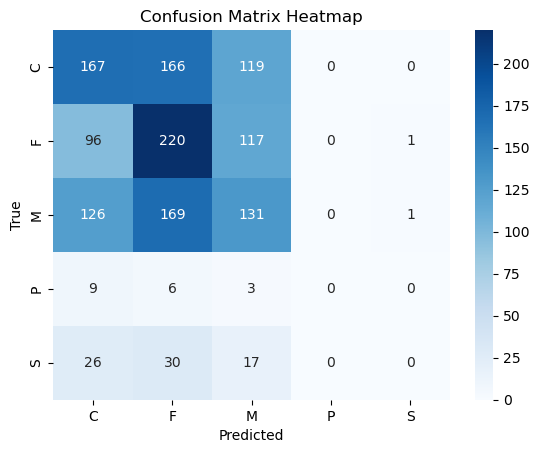

In [38]:
temp = np.arange(0.5,5,1)
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xticks(temp, labels=log_r.classes_)
plt.yticks(temp, labels=log_r.classes_)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix Heatmap")
plt.show()

In [39]:
cm

array([[167, 166, 119,   0,   0],
       [ 96, 220, 117,   0,   1],
       [126, 169, 131,   0,   1],
       [  9,   6,   3,   0,   0],
       [ 26,  30,  17,   0,   0]])

---
### 4.2.3 Classification Report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.39      0.37      0.38       452
           F       0.37      0.51      0.43       434
           M       0.34      0.31      0.32       427
           P       0.00      0.00      0.00        18
           S       0.00      0.00      0.00        73

    accuracy                           0.37      1404
   macro avg       0.22      0.24      0.23      1404
weighted avg       0.34      0.37      0.35      1404



---
### 4.2.4 Coefficient Weights

In [41]:
df = pd.DataFrame(log_r.coef_, columns=log_r.feature_names_in_)
df = df.set_index(log_r.classes_)
df

,MEDHINC_CY,age,sex_M,day_1,day_2,day_3,day_4,day_5,day_6
C,0.214741,-0.001827,-0.039218,-0.319444,-0.368545,-0.399883,-0.421232,-0.359391,0.127716
F,-0.127671,-0.028463,0.580149,0.223906,0.284450,0.594454,0.571762,0.415394,-0.020789
M,-0.090709,0.189758,-0.310284,-0.000649,-0.059013,-0.268305,-0.121643,-0.094852,-0.203685
P,0.079541,-0.334346,0.477331,-0.475541,-0.397658,0.224378,-0.068385,-0.353788,-0.527297
S,-0.103146,-0.977460,-0.771002,0.669826,0.781746,0.296862,-0.158507,0.415343,0.508110


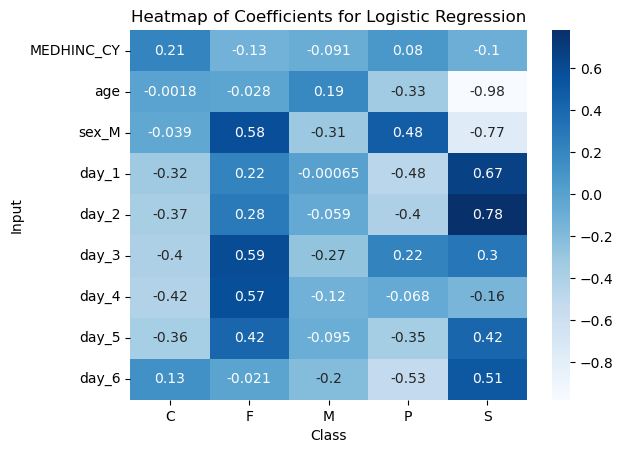

In [42]:
sb.heatmap(df.T, annot=True, cmap='Blues')
plt.xlabel('Class')
plt.ylabel('Input')
plt.title("Heatmap of Coefficients for Logistic Regression")
plt.show()

### 4.2.5 T-Test
- $H_0 \leq 0.2 \implies$ If randomly guessing, there are five classes so $\frac{1}{5}$ chance
- $H_a > 0.2 \implies$ From the trained one-vs-rest logisitc classifer 
- T Stat:
    - $\mu = 0.2$
    - $\hat p$ probability by the classifier
    - $n$ is length of test set
    - $\hat \sigma^2$ is the sample variance found by:
        - $\hat \sigma^2 = \frac{\hat p(1-\hat p)}{n-1}$ 
    - $T = \frac{\sqrt{n}(\hat p - \mu_0)}{\hat\sigma}$
- Find $p = 1-F_{n-1}(T)$
- Compare $p$ to $\alpha = 0.05$ significance level

In [43]:
p = log_r.score(x_test,y_test) # sample mean
print(f'Sample accuracy: {p}')
print(f'n: {len(x_test)}')


var = (p*(1-p))/(len(x_test)-1) # t distribution sample variance
print(f'Sample variance: {var}\n')

t_stat = np.sqrt(len(x_test))*(p-0.2)/np.sqrt(var)

p_val = 1-t.cdf(t_stat, len(x_test)-1)
hyp_alpha = 0.05
relationship = '<' if p_val < hyp_alpha else '>='
print(f'T-Stat: {t_stat}\nP-value: {p_val}\nHypothesis: {p_val:.4f}{relationship}{hyp_alpha}')

Sample accuracy: 0.36894586894586895
n: 1404
Sample variance: 0.00016594783658848658

T-Stat: 491.41151999983435
P-value: 0.0
Hypothesis: 0.0000<0.05


---
# 5. Pre-Training
- Find the train and test sets (0.8 train split)
- Find all the combinations of the inputs
- Perform 5-fold cross validation for each combination
---
## 5.1 Find the Input and Output  Names

In [44]:
inp = list(df_pandas_encoded.columns)
oup = ["MEDHINC_CY"]
for x in oup:
    inp.remove(x)
inp.remove('fel_misd')
inp, oup

(['age',
  'time',
  'TOTHH_CY',
  'sex_M',
  'sex_U',
  'day_1',
  'day_2',
  'day_3',
  'day_4',
  'day_5',
  'day_6',
  'month_1',
  'month_2',
  'month_3',
  'month_4',
  'month_5',
  'month_6',
  'month_7',
  'month_8',
  'month_9',
  'month_10',
  'month_11'],
 ['MEDHINC_CY'])

---
## 5.2 Split Train and Test Data

In [45]:
x,y = df_pandas_encoded[inp], df_pandas_encoded[oup]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)

---
## 5.3 Find Combinations
---
### 5.3.1 5-Fold CV for Ridge Regression

In [46]:
items = ['age','sex_M', 'day', 'month']
combs = []
for i in range(1, len(items)):
    combs.append(list(set(itertools.combinations(items, i))))

In [47]:
day_vals = ['day_1',
          'day_2',
          'day_3',
          'day_4',
          'day_5',
          'day_6']

month_vals = ['month_1',
              'month_2',
              'month_3',
              'month_4',
              'month_5',
              'month_6',
              'month_7',
              'month_8',
              'month_9',
              'month_10',
              'month_11']

best_dict = {"features": [], "score": -2**31, "alpha": 0}
alpha_vals = np.logspace(-1,3,50)
for k_amt in combs:
    for ind_comb in k_amt:
        comb = list(ind_comb)
        if 'day' in comb:
            comb.remove('day')
            comb += day_vals
        if 'month' in comb:
            comb.remove('month')
            comb += month_vals

        
        x_subset = x_train[comb].values
        
        for alpha in alpha_vals:
            cvs = cross_val_score(linear_model.Ridge(alpha=alpha), x_subset, y_train)
        
        if cvs.mean() > best_dict["score"]:
            best_dict["features"] = comb
            best_dict["score"] = cvs.mean()
best_dict

{'features': ['sex_M', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
 'score': -0.0005741596212547773,
 'alpha': 0}

---
### 5.3.2 20-Fold CV for Lasso Regression

In [48]:
x_train.columns

Index(['age', 'time', 'TOTHH_CY', 'sex_M', 'sex_U', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11'],
      dtype='object')

In [49]:
lasso = linear_model.LassoLarsCV(cv=20)
lasso.fit(x_train, y_train)
lasso_mse=lasso.mse_path_
lasso_alphas = lasso.cv_alphas_
mse_mean = []
mse_std = []
for i in range(len(lasso_mse)):
    mse_mean.append(lasso_mse[i].mean())
    mse_std.append(lasso_mse[i].std())
    
min_alpha = lasso_alphas[np.argmin(mse_mean)]
print(f"Best Average MSE: {min(mse_mean)} with {min_alpha=}")

Best Average MSE: 1.0635330110137016 with min_alpha=0.0054072422483765585


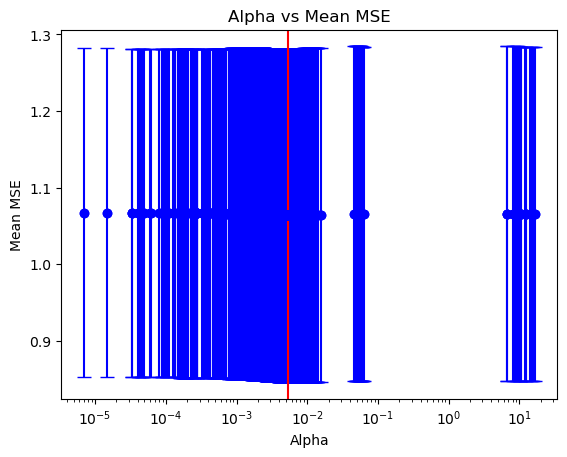

In [50]:
plt.errorbar(lasso_alphas,mse_mean, yerr=mse_std,fmt="o", capsize=5, color="blue")
plt.scatter(lasso_alphas, mse_mean, color='blue')
plt.xscale('log')

plt.axvline(x=min_alpha, color='red')
plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
plt.title('Alpha vs Mean MSE');

-----
# 6. Training Regression Models
- Find the input variables wanted
- Split the data
- Find all the possible combinations of inputs
- Use cross validation for multiple alpha values for a Ridge model
- Use cross validation on the Lasso model
- Visualize the Lasso alphas
- Fit the Ridge regression (Linear regression since $\alpha=0$
- Show the relevent information
    - $R^2$ 
    - Residual plot
- Fit the Lasso regression with the best $\alpha$
- Show the relevent information
    - $R^2$ 
    - Residual plot
- Show the weights for each input and model
    - Both tabular and heatmap

---
## 6.1 Training Linear Regression
- Note that the $\alpha$ found from Ridge is 0 so the documentation suggests to just use linear regression
    - https://scikitlearn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html


In [51]:
lr = linear_model.LinearRegression()

x_train = x_train[best_dict["features"]]
x_test = x_test[best_dict["features"]]

lr.fit(x_train, y_train)

LinearRegression()

---
## 6.2 Analysis
---
### 6.2.1 Coefficient of Determination: $R^2$ 

In [52]:
y_pred = lr.predict(x_test)
print(f"R2 train: {lr.score(x_train,y_train)}")
print(f"R2 Test: {lr.score(x_test,y_test)}")

R2 train: 0.001970106362371715
R2 Test: 0.0005099544702280578


---
### 6.2.2 Residual Plot 

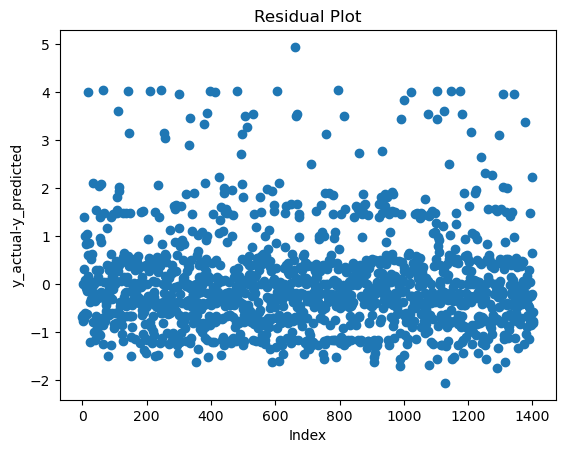

In [53]:
plt.scatter([i for i in range(len(y_test))],y_test-y_pred);
plt.xlabel("Index")
plt.ylabel("y_actual-y_predicted")
plt.title("Residual Plot");

---
## 6.3 Training Lasso Regression

In [54]:
lr_lasso = linear_model.Lasso(alpha=min_alpha)
lr_lasso.fit(x_train, y_train)

Lasso(alpha=0.0054072422483765585)

---
## 6.4 Analysis
---
### 6.4.1 Coefficient of Determination: $R^2$

In [55]:
y_lasso_pred = lr_lasso.predict(x_test)
print(f"R2 train: {lr_lasso.score(x_train,y_train)}")
print(f"R2 Test: {lr_lasso.score(x_test,y_test)}")

R2 train: 0.0013023960075648766
R2 Test: -0.0003890654305305219


---
### 6.4.2 Residual Plot

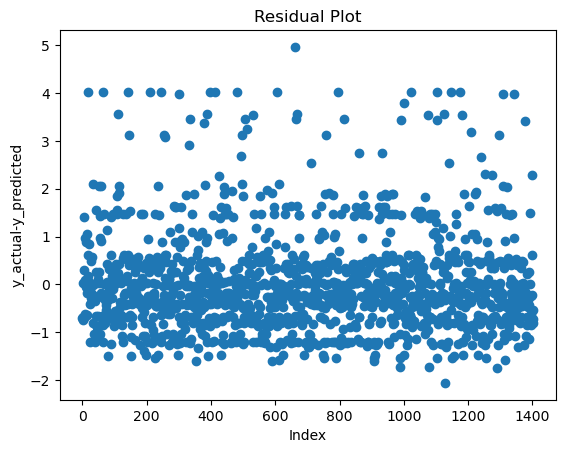

In [56]:
plt.scatter([i for i in range(len(y_test))],y_test.values.reshape(-1)-y_lasso_pred);
plt.xlabel("Index")
plt.ylabel("y_actual-y_predicted")
plt.title("Residual Plot");

---
## 6.5 Coefficient Weights

In [57]:
# Insert code here
df1 = pd.DataFrame(lr.coef_, columns=lr.feature_names_in_)
df2 = pd.DataFrame(lr_lasso.coef_.reshape(1,-1), columns=lr_lasso.feature_names_in_)
df = pd.concat([df1,df2])
df["Name"] = ["Linear Regression", "Lasso"]
df = df.set_index(df["Name"])
df = df.drop("Name", axis=1)
df

,sex_M,day_1,day_2,day_3,day_4,day_5,day_6
Name,,,,,,,
Linear Regression,-0.058285,-0.024533,-0.005987,-0.027754,-0.033236,0.087199,0.018827
Lasso,-0.028852,-0.000000,-0.000000,-0.000000,-0.000000,0.053737,0.000000


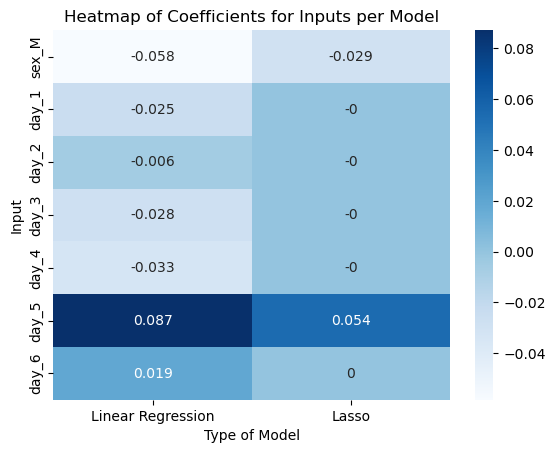

In [58]:
sb.heatmap(df.T, annot=True, cmap='Blues')
plt.xlabel('Type of Model')
plt.ylabel('Input')
plt.title("Heatmap of Coefficients for Inputs per Model")
plt.show()